# OpenCV

## 이미지 읽어 들이기

In [2]:
# 이미지 다운로드
import urllib.request as req
url = "http://uta.pw/shodou/img/28/214.png"
req.urlretrieve(url, "test.png")

# OpenCV로 읽어들이기
import cv2
img = cv2.imread("test.png")
print(img)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


### 이미지 인라인 출력하기

In [3]:
%matplotlib inline

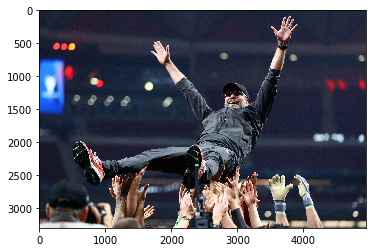

In [5]:
# 다운로드한 이미지 출력하기
import matplotlib.pyplot as plt
import cv2
img = cv2.imread('test.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

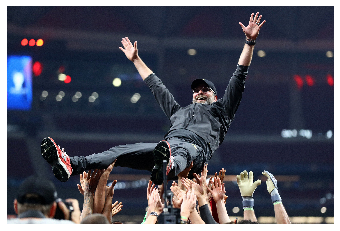

In [7]:
img = cv2.imread("test.jpg")
plt.axis("off") # axis 출력끄기
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

### 이미지 저장하기

In [8]:
import cv2

# 이미지 읽어 들이기
img = cv2.imread("test.jpg")

# 이미지 저장하기
cv2.imwrite("out.png", img)

True

### 이미지 크기 변경

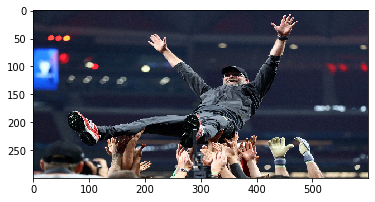

In [11]:
import matplotlib.pyplot as plt
import cv2

# 이미지 읽어 들이기
img = cv2.imread("test.jpg")
# 이미지 크기 병경하기
im2 = cv2.resize(img, (600,300))
# 크기 변경한 이미지 저장하기
cv2.imwrite("out-resize.png", im2)

# 이미지 출력하기
plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
plt.show()

### 이미지 자르기

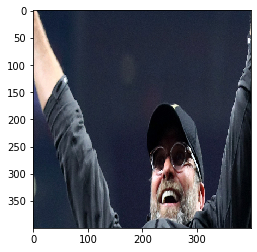

In [20]:
import matplotlib.pyplot as plt
import cv2

# 이미지 읽어 들이기
img = cv2.imread("test.jpg")
# 이미지 자르기
im2 = img[800:1500, 2000:3500]
# 이미지 크기 변경하기
im2 = cv2.resize(im2, (400,400))
# 크기 변경한 이미지 저장하기
cv2.imwrite("cut-resize.png", im2)

# 이미지 출력하기
plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
plt.show()

# 얼굴 검출

## 얼굴인식

얼굴의 좌표= 478 75 206 206


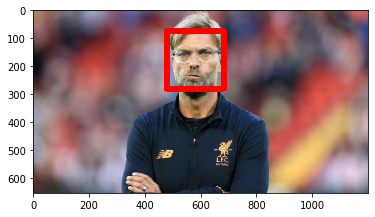

In [2]:
import matplotlib.pyplot as plt
import cv2

# 캐스케이드 파일 지정해서 검출기 생성하기
cascade_file = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)

# 이미지 읽어 들이고 그레이스케일로 변환하기
img = cv2.imread("man.jpeg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴 인식하기
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))

#결과 확인하기
if len(face_list) == 0:
    print("실패")
    quit()
    
# 인식한 부분 표시하기
for (x,y,w,h) in face_list:
    print("얼굴의 좌표=", x, y, w, h)
    red = (0, 0, 255)
    cv2.rectangle(img, (x,y), (x+w, y+h), red, thickness=20)
    
# 이미지 출력하기
cv2.imwrite("face-detect.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## OpenCV로 모자이크 처리하기

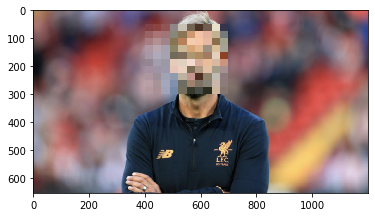

In [3]:
import matplotlib.pyplot as plt
import cv2
from mosaic import mosaic as mosaic

# 이미지 읽어들이고 모자이크 처리하기
img = cv2.imread("man.jpeg")
mos = mosaic(img, (400,50,700,300), 10)

# 이미지 출력하기
cv2.imwrite("man-mosaic.png", mos)
plt.imshow(cv2.cvtColor(mos, cv2.COLOR_BGR2RGB))
plt.show()

## 사람 얼굴 자동으로 모자이크 처리하기

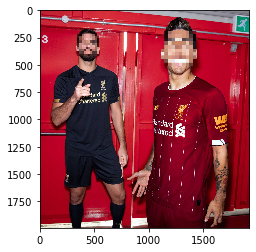

In [4]:
import matplotlib.pyplot as plt
import cv2
from mosaic import mosaic as mosaic

# 캐스케이드 파일 지정해서 검출기 생성하기
cascade_file = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)

# 이미지 읽어 들이고 그레이스케일로 변환하기
img = cv2.imread("team.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴 검출하기
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))
if len(face_list) == 0: quit()
    
# 인식한 부분에 모자이크 처리하기
for (x,y,w,h) in face_list:
    img = mosaic(img, (x, y, x+w, y+h), 10)
    
# 이미지 출력하기
cv2.imwrite("team-mosaic.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## OpenCV의 얼굴 검출은 옆모습과 기울어진 얼굴을 잘 검출하지 못함

--0--
얼굴의 좌표= 478 75 206 206
--10--
얼굴의 좌표= 506 187 191 191
--20--
--30--
--40--
--50--
--60--
--70--
--80--


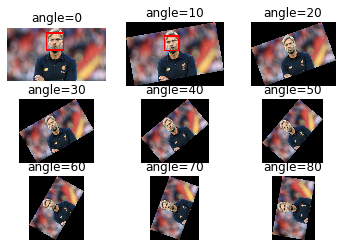

In [12]:
import matplotlib.pyplot as plt
import cv2
from scipy import ndimage

# 검출기 생성하고 이미지 읽어 들이기
cascade_file = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)
img = cv2.imread("man.jpeg")

# 얼굴 검출하고 영역 표시하기
def face_detect(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))
    # 인식한 영역 표시하기
    for (x,y,w,h) in face_list:
        print("얼굴의 좌표=", x, y, w, h)
        red = (0, 0, 255)
        cv2.rectangle(img, (x, y), (x+w, y+h), red, thickness=20)
        
# 여러 각도의 이미지를 만들고 테스트하기
for i in range(0, 9):
    ang = i * 10
    print("--" + str(ang) + "--")
    img_r = ndimage.rotate(img, ang)
    face_detect(img_r)
    plt.subplot(3, 3, i + 1)
    plt.axis("off")
    plt.title("angle=" + str(ang))
    plt.imshow(cv2.cvtColor(img_r, cv2.COLOR_BGR2RGB))
    
plt.show()

## 문자 인식 - 손글씨 숫자 판정하기

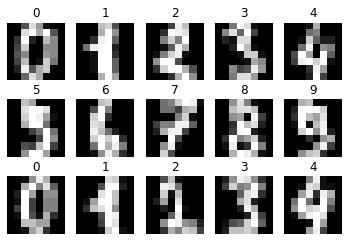

In [2]:
import matplotlib.pyplot as plt

# 손글씨 데이터 읽어들이기
from sklearn import datasets
digits = datasets.load_digits()

# 15개만 출력해보기
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.axis("off")
    plt.title(str(digits.target[i]))
    plt.imshow(digits.images[i], cmap="gray")
    
plt.show()

### 이미지형식

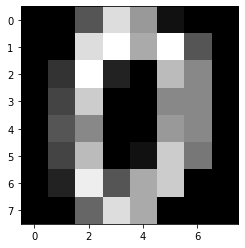

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [3]:
d0 = digits.images[0]
plt.imshow(d0, cmap="gray")
plt.show()
print(d0)

## 이미지 머신러닝하기

In [7]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm, metrics
from sklearn.metrics import accuracy_score

# 데이터 읽어들이기
digits = datasets.load_digits()
x = digits.images
y = digits.target
x = x.reshape((-1, 64)) # 2차원 배열을 1차원 배열로 변환하기

# 데이터를 학습 전용과 테스트 전용으로 분리하기
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#데이터 학습하기
clf = svm.LinearSVC()
clf.fit(x_train, y_train)

# 예측하고 정답률 출력하기
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9416666666666667


C:\Users\Owner\.conda\envs\tutorial\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### 학습한 데이터 저장하기

In [8]:
# 학습한 데이터 저장하기
from sklearn.externals import joblib
joblib.dump(clf, 'digits.pkl')

C:\Users\Owner\.conda\envs\tutorial\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['digits.pkl']

In [9]:
# 학습한 데이터 읽어들이기
clf = joblib.load("digits.pkl")

## 자신이 작성한 이미지 판별하기

In [10]:
import cv2
from sklearn.externals import joblib

def predict_digit(filename):
    # 학습한 데이터 읽어 들이기
    clf = joblib.load("digits.pkl")
    # 직접 그린 손글씨 이미지 읽어 들이기
    my_img = cv2.imread(filename)
    # 이미지 데이터를 학습에 적합하게 변환라기
    my_img = cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY)
    my_img = cv2.resize(my_img, (8, 8))
    my_img = 15 - my_img // 16 # 흑백반전
    # 2차원 배열을 1차원 배열로 변환하기
    my_img = my_img.reshape((-1, 64))
    # 데이터 예측하기
    res = clf.predict(my_img)
    return res[0]

# 이미지 파일을 지정해서 실행하기
n = predict_digit("my2.png")
print("my2.png = " + str(n))
n = predict_digit("my6.png")
print("my6.png = " + str(n))

my2.png = 3
my6.png = 5
